# Random Variable Generation

In [1]:
import numpy as np
import scipy
import seaborn as sns 
import pandas as pd 
from scipy.stats import uniform, expon, logistic, cauchy, chi2, gamma, beta, norm, binom, poisson
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

In [2]:
np.random.seed(2)

##### Create Fig. 2.1 pag. 43

In [3]:
Nsim = 10**4
x = uniform.rvs(size=Nsim)

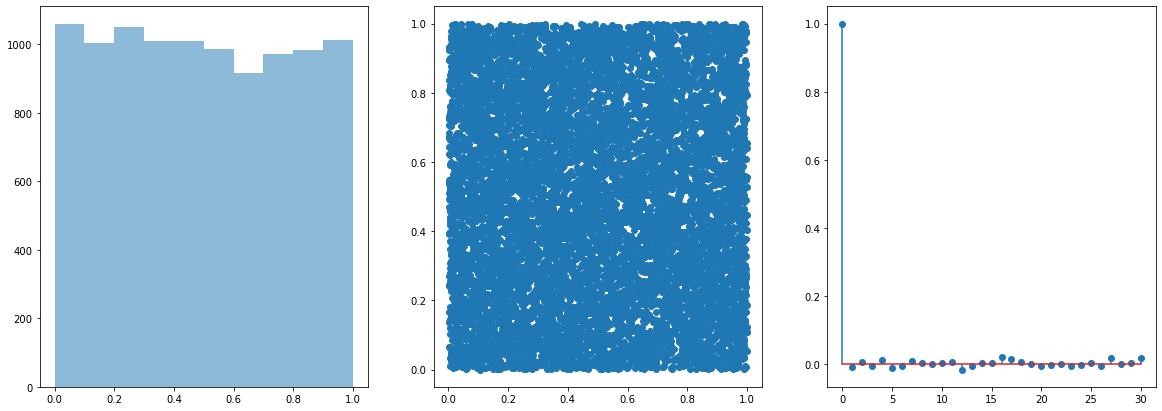

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,7))
ax1.hist(x, density=False, histtype='stepfilled', alpha=0.5)
x1 = x[0:Nsim-1]
x2 = x[1:Nsim]
ax2.scatter(x = x1, y = x2)
lags = 30
ax3.stem(np.arange(lags + 1), acf(x, nlags = lags))
plt.show()

##### Example 2.1. 
##### Create Fig. 2.2 pag. 45

If $X \sim \mathcal{E x p}(1)$, then $F(x)=1-e^{-x}$. Solving for $x$ in $u=1-e^{-x}$ gives $x=-\log (1-u)$. Therefore, if $U \sim \mathcal{U}_{[0,1]}$, then
$$
X=-\log U \sim \mathcal{E} x p(1)
$$

Text(0.5, 1.0, 'Exp from Scipy')

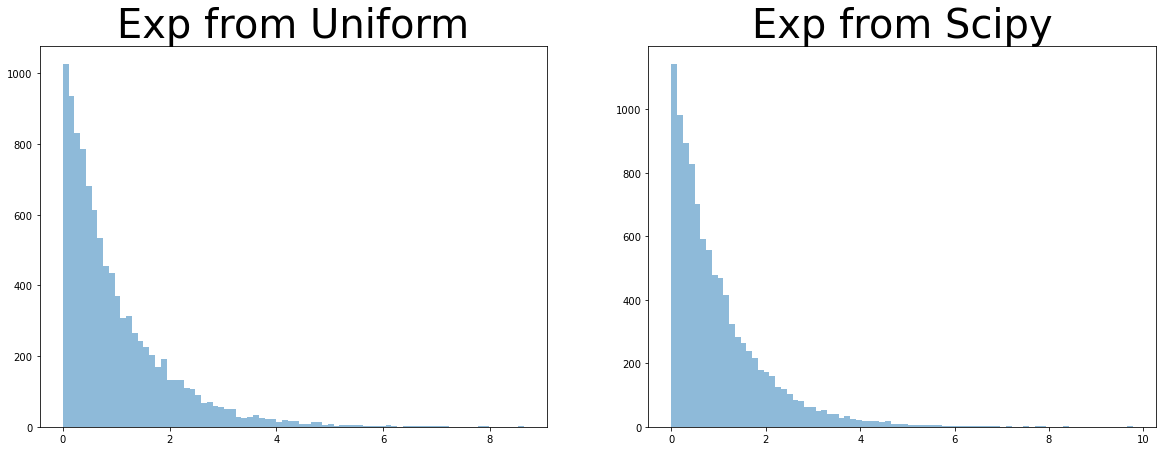

In [5]:
U = uniform.rvs(size=Nsim)
X = -np.log(U)
Y = expon.rvs(size=Nsim)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,7))
ax1.hist(X, density=False, bins= 80, histtype='stepfilled', alpha=0.5)
ax1.set_title('Exp from Uniform', fontsize=40)
ax2.hist(Y, density=False, bins= 80, histtype='stepfilled', alpha=0.5)
ax2.set_title('Exp from Scipy', fontsize=40)

##### Exercise 2.2 pag. 45

a. Logistic pdf: $f(x)=\frac{1}{\beta} \frac{e^{-(x-\mu) / \beta}}{\left[1+e^{-(x-\mu) / \beta}\right]^{2}}$, cdf: $F(x)=\frac{1}{1+e^{-(x-\mu) / \beta}}$.

If $X \sim \mathcal{L o g i s t i c}(\mu, \beta)$, then $F(x)=\frac{1}{1+e^{-(x-\mu) / \beta}}$. Solving for $x$ in $u=\frac{1}{1+e^{-(x-\mu) / \beta}}$ gives $x=\mu - \beta\log (\frac{1-u}{u})$. Therefore, if $U \sim \mathcal{U}_{[0,1]}$, then
$$
X=\mu - \beta\log \left( \frac{1-U}{U} \right) \sim \mathcal{L o g i s t i c}(\mu, \beta)
$$

Text(0.5, 1.0, 'Logistic from Scipy')

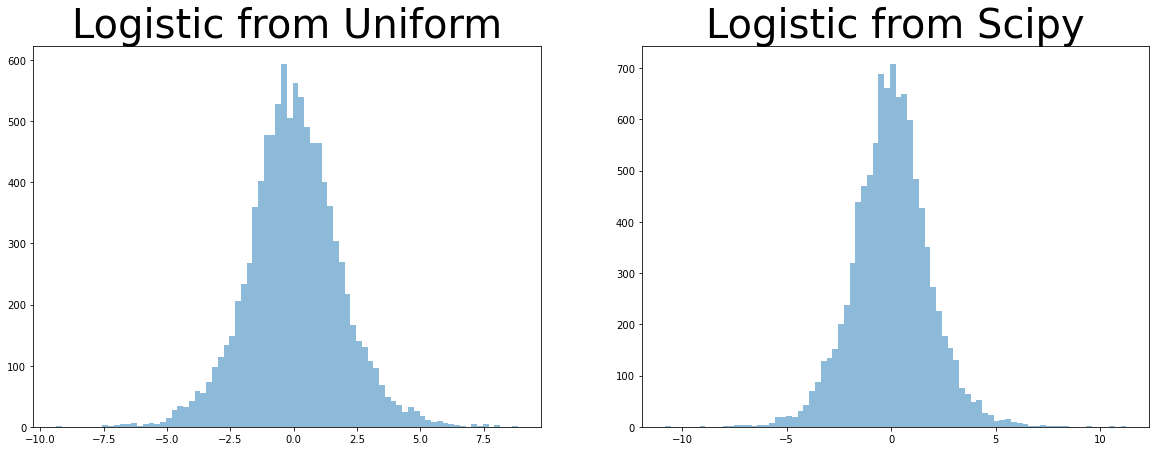

In [6]:
mu = 0 #location
beta_value = 1 #scale
U = uniform.rvs(size=Nsim)
X = mu - beta_value*np.log((1-U)/U)
Y = logistic.rvs(size=Nsim, loc = mu, scale = beta_value)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,7))
ax1.hist(X, density=False, bins= 80, histtype='stepfilled', alpha=0.5)
ax1.set_title('Logistic from Uniform', fontsize=40)
ax2.hist(Y, density=False, bins= 80, histtype='stepfilled', alpha=0.5)
ax2.set_title('Logistic from Scipy', fontsize=40)

b. Cauchy pdf: $f(x)=\frac{1}{\pi \sigma} \frac{1}{1+\left(\frac{x-\mu}{\sigma}\right)^{2}}$, cdf: $F(x)=\frac{1}{2}+\frac{1}{\pi} \arctan ((x-\mu) / \sigma)$.

If $X \sim \mathcal{Cauchy}(\mu, \sigma)$, then $F(x)=\frac{1}{2}+\frac{1}{\pi} \arctan ((x-\mu) / \sigma)$. Solving for $x$ in $u=\frac{1}{2}+\frac{1}{\pi} \arctan ((x-\mu) / \sigma)$ gives $x = \mu + \sigma\tan\left(\pi \left( u - \frac{1}{2} \right) \right)$. Therefore, if $U \sim \mathcal{U}_{[0,1]}$, then
$$
X=\mu + \sigma\tan\left(\pi \left( U - \frac{1}{2} \right) \right) \sim \mathcal{Cauchy}(\mu, \sigma)
$$

Text(0.5, 1.0, 'Cauchy from Scipy')

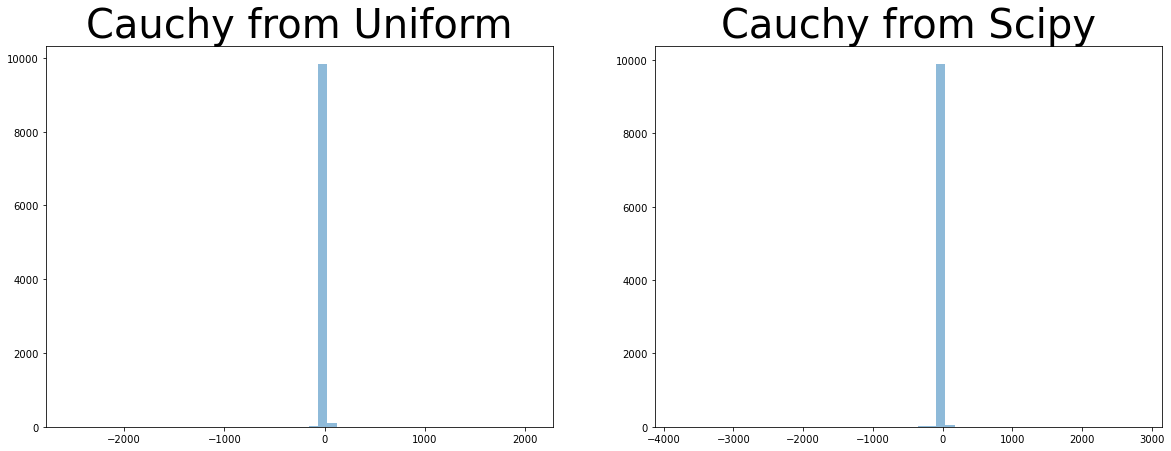

In [7]:
mu = 0 #location
sigma = 1 #scale
U = uniform.rvs(size=Nsim)
X = mu + sigma*np.tan(np.pi*(U-1/2))
Y = cauchy.rvs(size=Nsim, loc = mu, scale = sigma)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,7))
ax1.hist(X, density=False, bins= 50, histtype='stepfilled', alpha=0.5)
ax1.set_title('Cauchy from Uniform', fontsize=40)
ax2.hist(Y, density=False, bins= 50, histtype='stepfilled', alpha=0.5)
ax2.set_title('Cauchy from Scipy', fontsize=40)

##### Example 2.2 pag. 46

\begin{aligned}
&Y=2 \sum_{j=1}^{\nu} X_{j} \sim \chi_{2 \nu}^{2}, \quad \nu \in \mathbb{N}^{*}
\end{aligned}

Text(0.5, 1.0, 'Chi from Scipy')

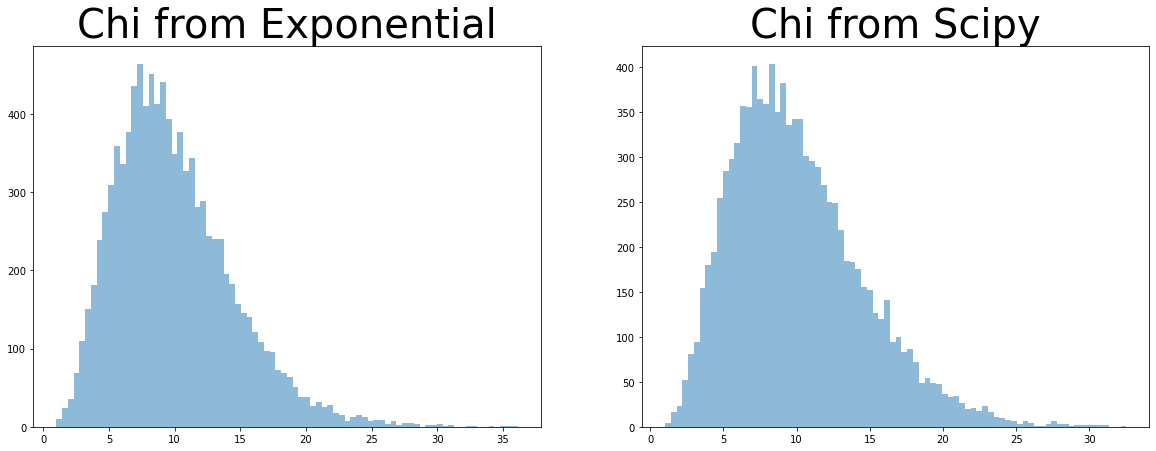

In [8]:
v = 5
exps = []
for i in range(v):
    Xj = expon.rvs(size=Nsim)
    exps.append(Xj)
Y = np.array(exps).sum(axis = 0)*2
chi = chi2.rvs(2*v, size = Nsim)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,7))
ax1.hist(Y, density=False, bins= 80, histtype='stepfilled', alpha=0.5)
ax1.set_title('Chi from Exponential', fontsize=40)
ax2.hist(chi, density=False, bins= 80, histtype='stepfilled', alpha=0.5)
ax2.set_title('Chi from Scipy', fontsize=40)

\begin{aligned}
&Y=\beta \sum_{j=1}^{a} X_{j} \sim \mathcal{G}(a, \beta), \quad a \in \mathbb{N}^{*}, \\
\end{aligned}

Text(0.5, 1.0, 'Gamma from Scipy')

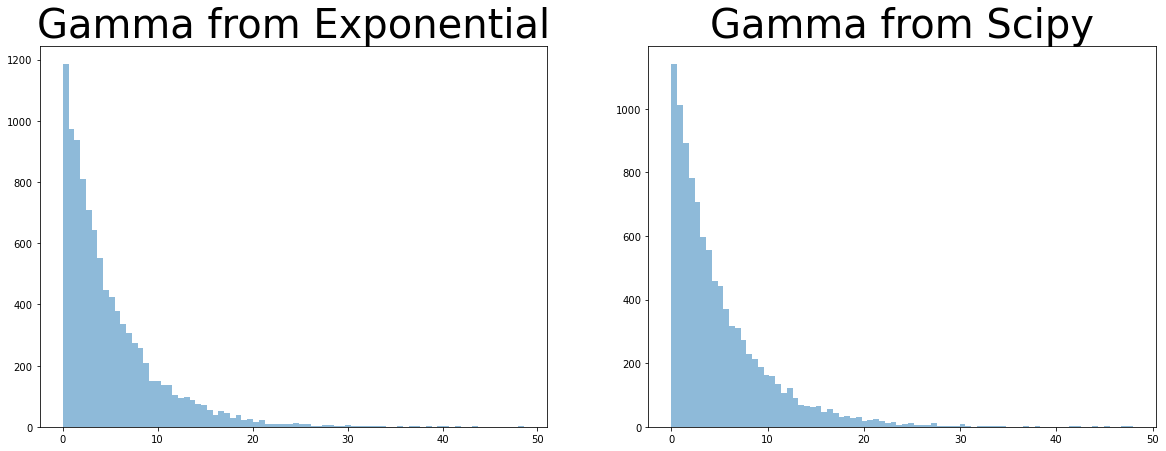

In [9]:
a = 1
beta_value = 5
exps = []
for i in range(a):
    Xj = expon.rvs(size=Nsim)
    exps.append(Xj)
Y = np.array(exps).sum(axis = 0)*beta_value
gamma_distr = gamma.rvs(a, scale = beta_value, size = Nsim)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,7))
ax1.hist(Y, density=False, bins= 80, histtype='stepfilled', alpha=0.5)
ax1.set_title('Gamma from Exponential', fontsize=40)
ax2.hist(gamma_distr, density=False, bins= 80, histtype='stepfilled', alpha=0.5)
ax2.set_title('Gamma from Scipy', fontsize=40)

\begin{aligned}
&Y=\frac{\sum_{j=1}^{a} X_{j}}{\sum_{j=1}^{a+b} X_{j}} \sim \mathcal{B} e(a, b), \quad a, b \in \mathbb{N}^{*},
\end{aligned}

Text(0.5, 1.0, 'Beta from Scipy')

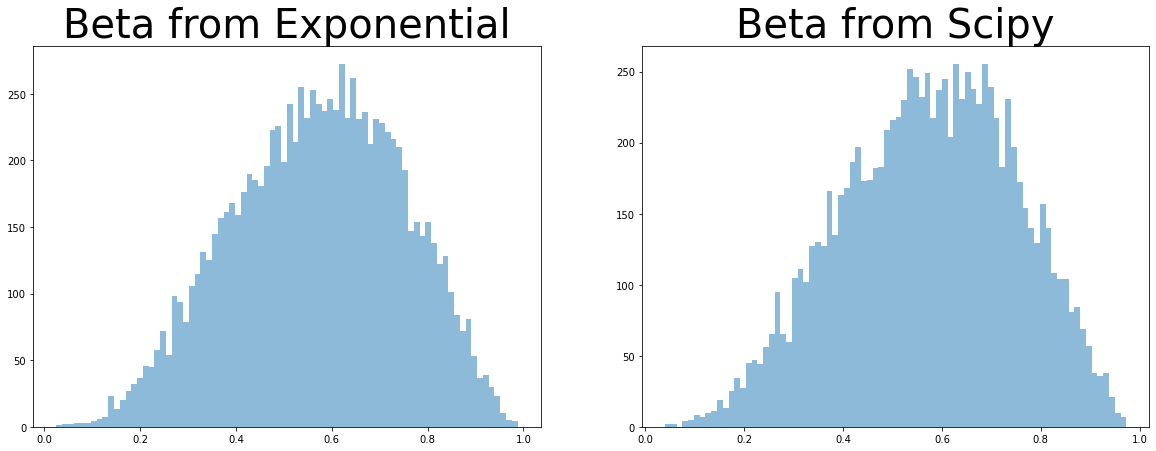

In [10]:
a = 4
b = 3
num = []
den = []
for i in range(a+b):
    Xj = expon.rvs(size=Nsim)
    den.append(Xj)
    if i<a:
        num.append(Xj)
num = np.array(num).sum(axis = 0)
den = np.array(den).sum(axis = 0)
Y = num/den
beta_distr = beta.rvs(a, b, size = Nsim)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,7))
ax1.hist(Y, density=False, bins= 80, histtype='stepfilled', alpha=0.5)
ax1.set_title('Beta from Exponential', fontsize=40)
ax2.hist(beta_distr, density=False, bins= 80, histtype='stepfilled', alpha=0.5)
ax2.set_title('Beta from Scipy', fontsize=40)

##### Example 2.3

Box-Muller algorithm

If $U_{1}$ and $U_{2}$ are iid $\mathcal{U}_{[0,1]}$, the variables $X_{1}$ and $X_{2}$ defined by
$$
\left.X_{1}=\sqrt{-2 \log \left(U_{1}\right)} \cos \left(2 \pi U_{2}\right), \quad X_{2}=\sqrt{-2 \log \left(U_{1}\right.}\right) \sin \left(2 \pi U_{2}\right),
$$
are  iid $\mathcal{N}(0,1)$

In [11]:
U1 = uniform.rvs(size=Nsim)
U2 = uniform.rvs(size=Nsim)
X1 = np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
X2 = np.sqrt(-2*np.log(U1))*np.sin(2*np.pi*U2)
Z = norm.rvs(size=Nsim)

Text(0.5, 1.0, 'Normal from Scipy')

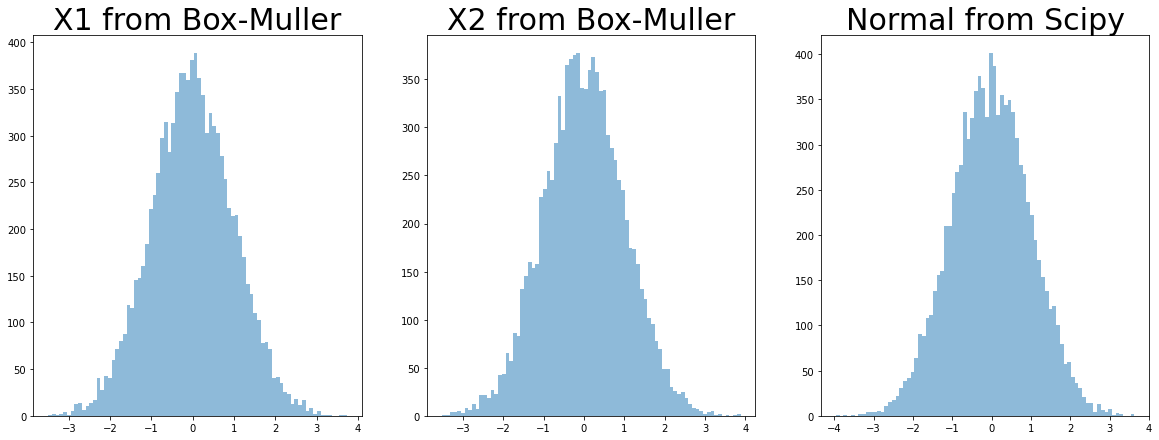

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,7))
ax1.hist(X1, density=False, bins= 80, histtype='stepfilled', alpha=0.5)
ax1.set_title('X1 from Box-Muller', fontsize=30)
ax2.hist(X2, density=False, bins= 80, histtype='stepfilled', alpha=0.5)
ax2.set_title('X2 from Box-Muller', fontsize=30)
ax3.hist(Z, density=False, bins= 80, histtype='stepfilled', alpha=0.5)
ax3.set_title('Normal from Scipy', fontsize=30)

##### Example 2.4 pag. 48

$X \sim \mathcal{Bin}(10, 0.3)$

Text(0.5, 1.0, 'Binomial from Scipy')

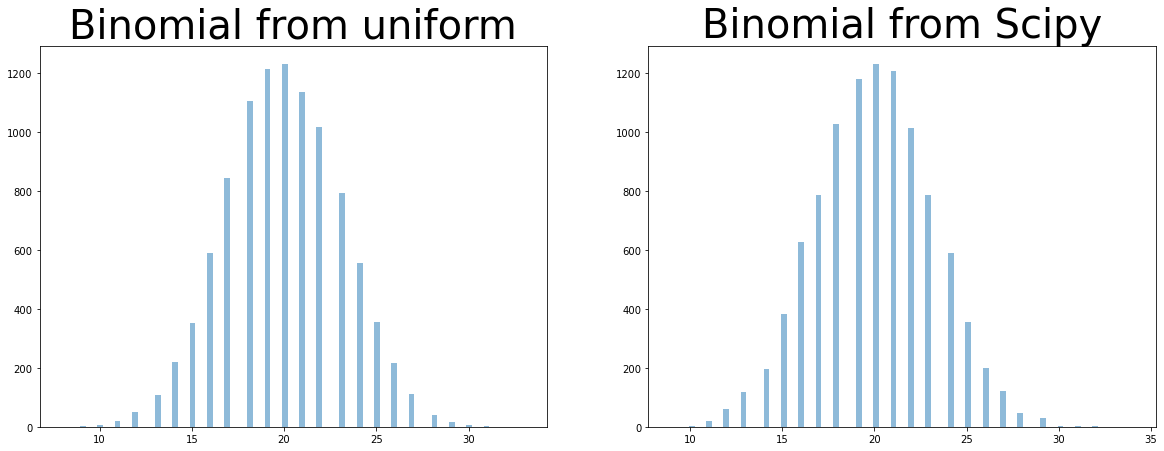

In [13]:
N_binom = 40
prob_succ = 0.5
binom_supports = []
binom_probabilities = []
#first, we have to calculate the probabilities
for k in range (N_binom+1):
    binom_supports.append(k)
    binom_probabilities.append(binom.cdf(n = N_binom, p = prob_succ, k = k))

#now we can simulate
U = uniform.rvs(size=Nsim)
X = []
binom_distr = []
for i in range(Nsim):
    X.append(binom_supports[np.searchsorted(binom_probabilities, U[i], side='right')])
    binom_distr.append(binom.rvs(n = N_binom, p = prob_succ))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,7))
ax1.hist(X, density=False, bins= 80, histtype='stepfilled', alpha=0.5)
ax1.set_title('Binomial from uniform', fontsize=40)
ax2.hist(binom_distr, density=False, bins= 80, histtype='stepfilled', alpha=0.5)
ax2.set_title('Binomial from Scipy', fontsize=40)

$X \sim \mathcal{P}(7)$

We have to approximate up to a given number of decimals.

Text(0.5, 1.0, 'Poisson from Scipy')

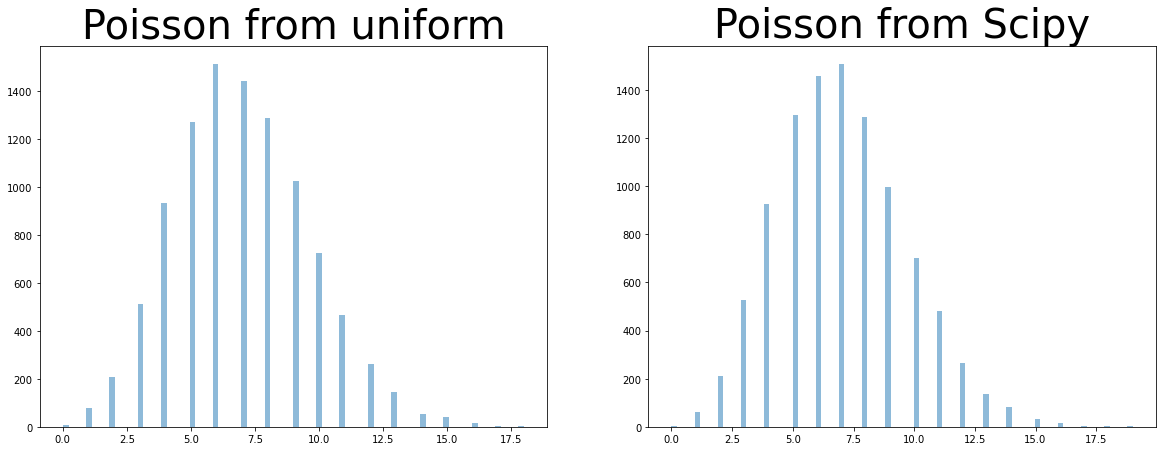

In [14]:
#first, we have to calculate the probabilities
approximation = 0.99995
poiss_lambda = 7
poiss_supports = []
poiss_probabilities = []
poiss_prob = 0
k = 0
while (poiss_prob<approximation):
    poiss_supports.append(k)
    poiss_prob = poisson.cdf(mu = poiss_lambda, k = k)
    poiss_probabilities.append(poiss_prob)
    k += 1
#now we can simulate
U = uniform.rvs(size=Nsim)
X = []
poiss_distr = []
for i in range(Nsim):
    index = np.searchsorted(poiss_probabilities, U[i], side='right')
    if index!=len(poiss_probabilities): # if index == len(poiss_probabilities) it means that the value is greater than our approximation
        X.append(poiss_supports[index])
        poiss_distr.append(poisson.rvs(mu = poiss_lambda))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,7))
ax1.hist(X, density=False, bins= 80, histtype='stepfilled', alpha=0.5)
ax1.set_title('Poisson from uniform', fontsize=40)
ax2.hist(poiss_distr, density=False, bins= 80, histtype='stepfilled', alpha=0.5)
ax2.set_title('Poisson from Scipy', fontsize=40)

##### Example 2.5

$X \sim \mathcal{P}(100)$

In this case the above approach it's not very efficient (see pag. 49). We will ignore the cases where X<70 or X>130. We loose the samples with a probability of $P(X<70)+P(X>130)=0.00268$

This means that the expected values of the number of X samples is Nsim\*0.00268 (we loose 0.00268% of samples)

In [15]:
#first, we have to calculate the probabilities
approximation = 0.99995
poiss_lambda = 100
poiss_supports = []
poiss_probabilities = []
poiss_prob = 0
k = 70
while (k<=130):
    poiss_supports.append(k)
    poiss_prob = poisson.cdf(mu = poiss_lambda, k = k)
    poiss_probabilities.append(poiss_prob)
    k += 1

expected_number_of_samples_lost_in_percentage = poisson.cdf(mu = poiss_lambda, k = 70) + 1-(poisson.cdf(mu = poiss_lambda, k = 130))
expected_number_of_samples_lost_in_percentage = np.round(expected_number_of_samples_lost_in_percentage, 5)
print('We expect to loose {} % of our samples '.format(expected_number_of_samples_lost_in_percentage))

We expect to loose 0.00268 % of our samples 


Text(0.5, 1.0, 'Poisson from Scipy')

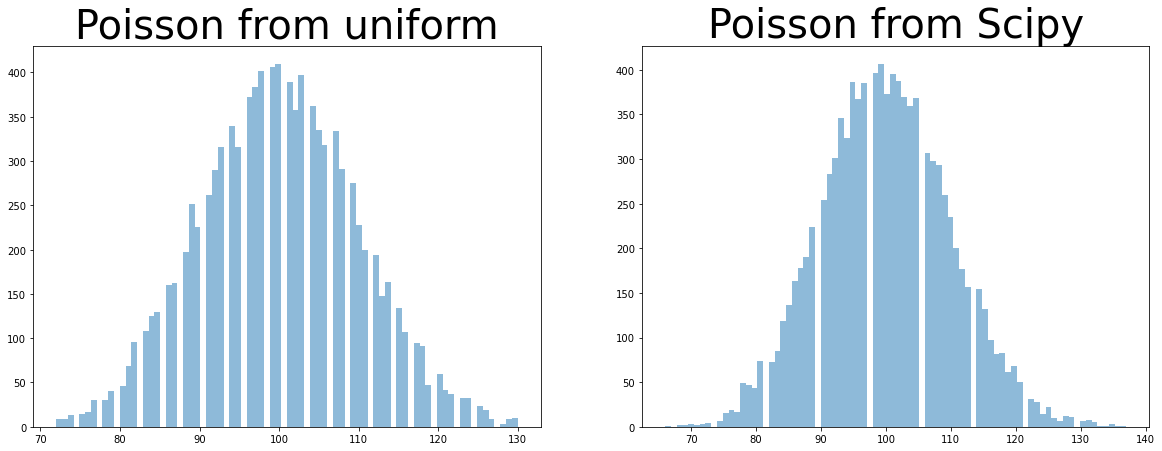

In [16]:
#now we can simulate
U = uniform.rvs(size=Nsim)
X = []
poiss_distr = []
for i in range(Nsim):
    index = np.searchsorted(poiss_probabilities, U[i], side='right')
    if ((index!=len(poiss_probabilities))&(index!=0)): # otherwise it means that X<70 or X>130
        X.append(poiss_supports[index])
        poiss_distr.append(poisson.rvs(mu = poiss_lambda))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,7))
ax1.hist(X, density=False, bins= 80, histtype='stepfilled', alpha=0.5)
ax1.set_title('Poisson from uniform', fontsize=40)
ax2.hist(poiss_distr, density=False, bins= 80, histtype='stepfilled', alpha=0.5)
ax2.set_title('Poisson from Scipy', fontsize=40)

In [17]:
number_of_samples_lost_in_percentage = 1-len(X)/Nsim
number_of_samples_lost_in_percentage = np.round(number_of_samples_lost_in_percentage, 5)
print('We lost the {}% of our samples and we were expecting to loose the {}%'.format(number_of_samples_lost_in_percentage, expected_number_of_samples_lost_in_percentage))

We lost the 0.0031% of our samples and we were expecting to loose the 0.00268%


##### Example 2.7 pag. 53

$X \sim \mathcal{Be}(2.7, 6.3)$

In [18]:
Nsim = 10**4

In [19]:
#here g is a costant function
def g(y):
    return 1
def f(y, a, b):
    return beta.pdf(y, a = a, b = b)

In [20]:
a = 2.7
b = 6.3
M = -scipy.optimize.minimize(lambda y: -f(y, a, b), bounds=[(0, 1)], x0 = 0.5, method ='SLSQP').fun[0]
print(M)

2.6697440084590562


In [21]:
u = uniform.rvs(size=Nsim)
y = uniform.rvs(size=Nsim)
x = y[u<=(f(y, a, b)/(M*g(y)))]
beta_distr = beta.rvs(a, b, size = Nsim)

Text(0.5, 1.0, 'Beta from Scipy')

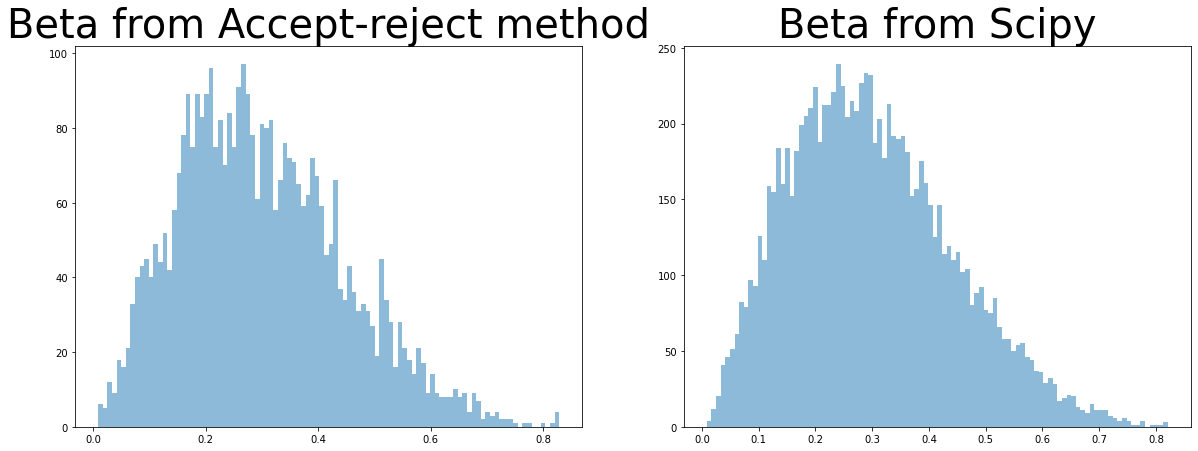

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,7))
ax1.hist(x, density=False, bins= 100, histtype='stepfilled', alpha=0.5)
ax1.set_title('Beta from Accept-reject method', fontsize=40)
ax2.hist(beta_distr, density=False, bins= 100, histtype='stepfilled', alpha=0.5)
ax2.set_title('Beta from Scipy', fontsize=40)

Text(0.5, 1.0, 'Accept-reject method for Beta(2.7,6.3)')

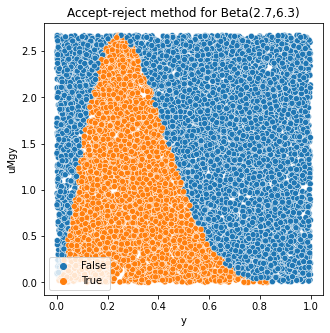

In [23]:
df = pd.DataFrame({'y':y, 'u':u})
df['uMgy'] = df.u*M #it s multiplied by g(y) which is 1 always
df['label'] = df['u']<=(beta.pdf(df['y'], a = a, b = b)/(M*g(df['y'])))
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.scatterplot(x='y',y='uMgy',hue = 'label',data = df)
ax.legend(loc='lower left')
ax.set_title('Accept-reject method for Beta(2.7,6.3)')

In [24]:
print('We were expecting to accept {}% of the candidates accepted'.format(1/M))
print('{}% of the candidates are accepted'.format(len(x)/Nsim))

We were expecting to accept 0.37456774763105016% of the candidates accepted
0.3797% of the candidates are accepted


##### Example 2.8 pag. 55

$X \sim \mathcal{Be}(2, 6)$

In [25]:
def g(y):
    return beta.pdf(y, a = 2.7, b = 6.3)
def f(y, a, b):
    return beta.pdf(y, a = a, b = b)

In [26]:
a = 2
b = 6
M = -scipy.optimize.minimize(lambda y: -(g(y)/f(y, a, b)), bounds=[(0, 1)], x0 = 0.1, method ='SLSQP').fun[0]
print(M)

1.671807754083479


/var/folders/jw/2zcyhtb14rsd02rj1vtd10yh0000gn/T/ipykernel_50646/2965438143.py:3: RuntimeWarning: invalid value encountered in true_divide
  M = -scipy.optimize.minimize(lambda y: -(g(y)/f(y, a, b)), bounds=[(0, 1)], x0 = 0.1, method ='SLSQP').fun[0]


In [27]:
u = uniform.rvs(size=Nsim)
y = uniform.rvs(size=Nsim)
x = y[u <= (f(y, a, b)/(M*g(y))) ]
beta_distr = beta.rvs(a, b, size = Nsim)

Text(0.5, 1.0, 'Beta from Scipy')

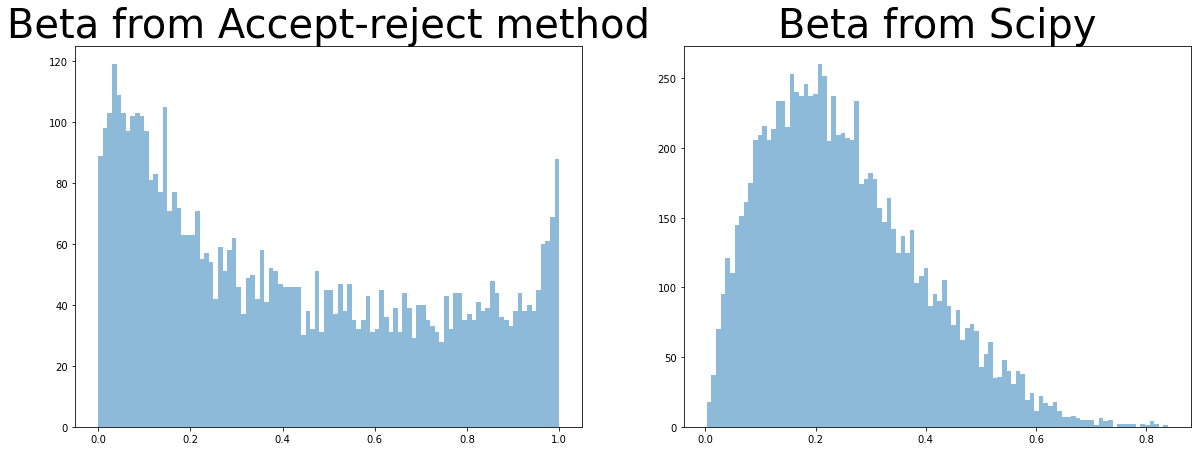

In [28]:
# It doesn't look like a beta... it s weird
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,7))
ax1.hist(x, density=False, bins= 100, histtype='stepfilled', alpha=0.5)
ax1.set_title('Beta from Accept-reject method', fontsize=40)
ax2.hist(beta_distr, density=False, bins= 100, histtype='stepfilled', alpha=0.5)
ax2.set_title('Beta from Scipy', fontsize=40)

Text(0.5, 1.0, 'Accept-reject method for Beta(2,6)')

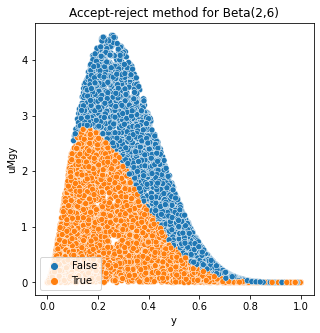

In [29]:
df = pd.DataFrame({'y':y, 'u':u})
df['uMgy'] = df.u*M*g(df['y'])
df['label'] = df['u']<=(beta.pdf(df['y'], a = a, b = b)/(M*g(df['y'])))
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.scatterplot(x='y',y='uMgy',hue = 'label',data = df)
ax.legend(loc='lower left')
ax.set_title('Accept-reject method for Beta(2,6)')

In [30]:
print('We were expecting to accept {}% of the candidates accepted'.format(1/M))
print('{}% of the candidates are accepted'.format(len(x)/Nsim))

We were expecting to accept 0.598154900022115% of the candidates accepted
0.5298% of the candidates are accepted
